Nomes dos integrantes: 

* Antônio Augusto Carnevalli NUSP: 13682909

* Gustavo Beraldo de Andrade Melo NUSP: 11258183

# PSI3471 - Exercicio Computacional 3


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

* Declaração de Variaveis de Entrada do Treinamento
* Definicao de Função Limitadora para Saída do Perceptron

In [2]:
# Parametros 
Nb = 50
Ne = 2500
Ntreino = 5000
Nteste = 1000
Nneuronios = 3
eta = 2/Nneuronios

# Funcao A
xtreinoA = np.round(np.random.uniform(1, 100, (Ntreino, 1)), 0)
dtreinoA = 1/(xtreinoA)

# Funcao B
xtreinoB = np.round(np.random.uniform(1, 10, (Ntreino, 1)), 0)
dtreinoB = np.log10(xtreinoB)

# Funcao C
xtreinoC = np.round(np.random.uniform(1, 10, (Ntreino, 1)), 0)
dtreinoC = np.exp(-(xtreinoC))

# Funcao D
xtreinoD = np.round(np.random.uniform(0, (np.pi)/2, (Ntreino, 1)), 0)
dtreinoD = np.sin(xtreinoD)

# Função sigmoidal
def sigmoid(X):
   return 1/(1+np.exp(-X))


Definição da função MLP para N camadas ocultas no modo de treinamento mini-batch.

In [3]:
# Utilizaremos para o treino uma adaptação do código visto em aula

def redeMLP_gen(x, d, eta, Nt, Nb, Ne, Nn):
    """
    J_MSE, Warray = redeMLP(x, d, Nn, eta, Nt, Nb, Ne, Nn)
    Saídas:
    J_MSE: valor da função custo ao longo das épocas
    W1, W2, W3: matriz de pesos (inclui o bias) da última época
    Entradas:
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Nb: tamanho do mini-batch
    Ne: número de épocas
    Nn: número de neuronios na camada oculta
    """

    # vetor que contém o número de neurônios em cada camada, mas na posição 0, contém o número de entradas da rede
    Narray = [1, Nn, 1]

    # número de mini-batches por época
    Nmb = int(np.floor(Nt / Nb))

    # inicialização das matrizes de pesos W
    W1 = 0.2 * np.random.rand(1,2) - 0.01
    W2 = 0.2 * np.random.rand(Nn,2) - 0.01
    W3 = 0.2 * np.random.rand(1,Nn+1) - 0.01

    # passo de adaptação dividido pelo tamanho do mini-batch
    eta = eta / Nb

    # inicialização do vetor que contém o valor da função custo
    J_MSE = np.zeros((Ne, 1))

    # Juntamos o vetor de entrada com o sinal desejado e inserimos
    # uma coluna de uns para levar em conta o bias
    Xd = np.hstack((np.ones((Nt, 1)), x, d))

    # vetor de uns para o bias no mini-batch
    b = np.ones((Nb, 1))

    # for das épocas
    for k in range(Ne):
        np.random.shuffle(Xd)
        X = Xd[:, 0 : 2]
        d = Xd[:, [2]]

        # for dos mini-batches
        for l in range(Nmb):
            dmb = d[l * Nb : (l + 1) * Nb].reshape(-1, 1)
            Xmb = X[l * Nb : (l + 1) * Nb, :]
            dphi2 = np.zeros((Nb, Nn))
            X3mb = np.ones((Nb, 1))
            delta2 = np.zeros((Nb, Nn))

            # Cálculo progressivo
            # Camada 1
            v1mb = Xmb @ W1.T
            y1mb = sigmoid(v1mb)
            dphi1 = y1mb * (1 - y1mb)  # derivada da função sigmoide
            X2mb = np.hstack((b, y1mb))

            # Camada 2
            for i in range(Nn):
              v2mb = X2mb @ W2[i,:].T
              y2mb = sigmoid(v2mb)
              dphi2[:,i] = y2mb * (1 - y2mb)
              X3mb = np.column_stack((X3mb, y2mb))
            
            # Camada 3
            v3mb = X3mb @ W3.T
            y3mb = sigmoid(v3mb)
            dphi3 = y3mb * (1 - y3mb)

            # erro da última camada
            emb = dmb - y3mb
                        
            # Gradiente e peso das camadas finais                
            delta3 = dphi3 * emb
            W3 = W3 + eta * delta3.T @ X3mb

            # Cálculo dos gradientes locais e e pesos locais
            for i in range(Nn):
              delta2[:,[i]] = dphi2[:,[i]] * (delta3 * W3[0,i])
              W2 = W2 + eta * delta2[:,[i]].T @ X2mb

            delta1 = dphi1 * (delta2[:,[1]] * W2[1,1])
            W1 = W1 + eta * delta1.T @ Xmb

            # guarda no vetor J_MSE a norma do vetor de erros de saída ao quadrado
            J_MSE[k] = (J_MSE[k] + (np.linalg.norm(emb)) ** 2)

        # cálculo do MSE (divide o valor acumulado pelo número de
        # mini-batches x tamanho do batch x número de neurônios
        # da camada de saída)        
        J_MSE[k] = J_MSE[k] / (Nmb * Nb * 1)
        
        if k % 100 == 0:
            print(f"Época: {k}, MSE: {J_MSE[k]}")
          
    return J_MSE, W1, W2, W3

* Uso da rede MLP para o modo de treinamento para obtenção dos pesos
* Pesos obtidos pelo modo de treinamento


Época: 0, MSE: [0.03072725]
Época: 100, MSE: [0.00786252]
Época: 200, MSE: [0.00243358]
Época: 300, MSE: [0.00122393]
Época: 400, MSE: [0.00114649]
Época: 500, MSE: [0.00109946]
Época: 600, MSE: [0.00106062]
Época: 700, MSE: [0.00102841]
Época: 800, MSE: [0.00100201]
Época: 900, MSE: [0.00097992]
Época: 1000, MSE: [0.0009599]
Época: 1100, MSE: [0.00094326]
Época: 1200, MSE: [0.00092927]
Época: 1300, MSE: [0.00091657]
Época: 1400, MSE: [0.00090423]
Época: 1500, MSE: [0.00089457]
Época: 1600, MSE: [0.00088496]
Época: 1700, MSE: [0.00087843]
Época: 1800, MSE: [0.0008693]
Época: 1900, MSE: [0.00086235]
Época: 2000, MSE: [0.00085554]
Época: 2100, MSE: [0.0008503]
Época: 2200, MSE: [0.00084395]
Época: 2300, MSE: [0.00083983]
Época: 2400, MSE: [0.00083265]
Época: 0, MSE: [0.07228698]
Época: 100, MSE: [0.00360081]
Época: 200, MSE: [0.00303805]
Época: 300, MSE: [0.00277055]
Época: 400, MSE: [0.00261495]
Época: 500, MSE: [0.00251346]
Época: 600, MSE: [0.00244257]
Época: 700, MSE: [0.00238671]
Ép

(0.0, 2500.0, -52.78240226584429, -7.172750608113983)

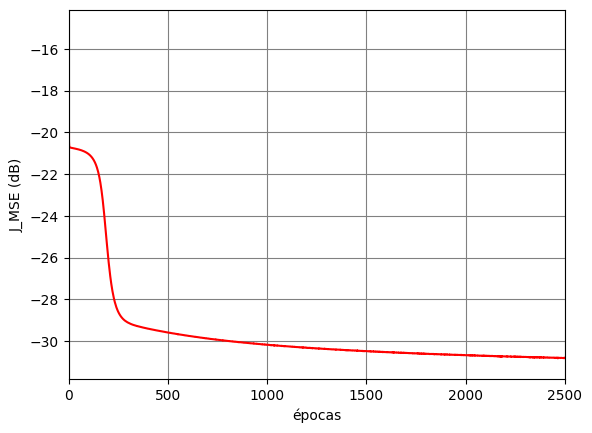

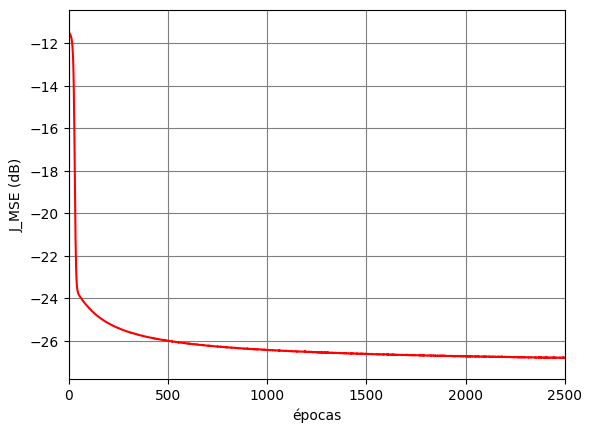

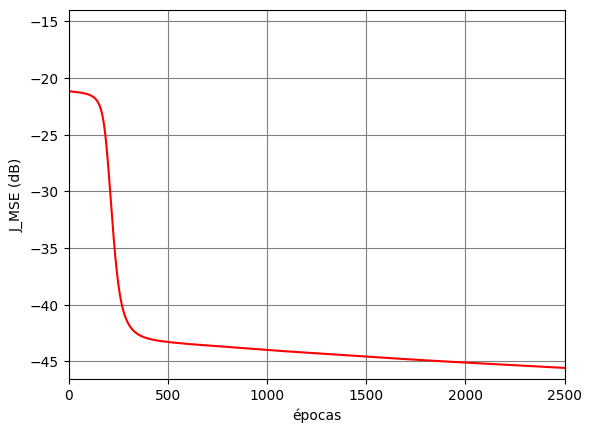

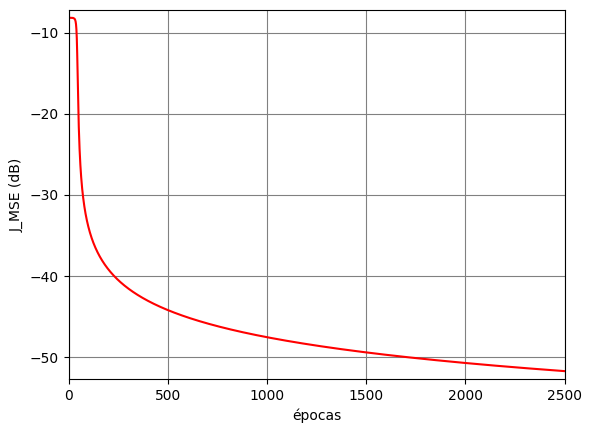

In [4]:
# Pesos de A
(J_MSEA, W1A, W2A, W3A) = redeMLP_gen(xtreinoA, dtreinoA, eta, Ntreino, Nb, Ne, Nneuronios)

plt.figure()
J_MSEdB = 10 * np.log10(J_MSEA)
plt.plot(J_MSEdB, "r")
plt.ylabel("J_MSE (dB)")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.xlabel("épocas")
plt.axis([0, Ne, min(J_MSEdB) - 1, max(J_MSEdB) + 1])

# Pesos de B
(J_MSEB, W1B, W2B, W3B) = redeMLP_gen(xtreinoB, dtreinoB, eta, Ntreino, Nb, Ne, Nneuronios)

plt.figure()
J_MSEdB = 10 * np.log10(J_MSEB)
plt.plot(J_MSEdB, "r")
plt.ylabel("J_MSE (dB)")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.xlabel("épocas")
plt.axis([0, Ne, min(J_MSEdB) - 1, max(J_MSEdB) + 1])

# Pesos de C
(J_MSEC, W1C, W2C, W3C) = redeMLP_gen(xtreinoC, dtreinoC, eta, Ntreino, Nb, Ne, Nneuronios)

plt.figure()
J_MSEdB = 10 * np.log10(J_MSEC)
plt.plot(J_MSEdB, "r")
plt.ylabel("J_MSE (dB)")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.xlabel("épocas")
plt.axis([0, Ne, min(J_MSEdB) - 1, max(J_MSEdB) + 1])

# Pesos de D
(J_MSED, W1D, W2D, W3D) = redeMLP_gen(xtreinoD, dtreinoD, eta, Ntreino, Nb, Ne, Nneuronios)

plt.figure()
J_MSEdB = 10 * np.log10(J_MSED)
plt.plot(J_MSEdB, "r")
plt.ylabel("J_MSE (dB)")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.xlabel("épocas")
plt.axis([0, Ne, min(J_MSEdB) - 1, max(J_MSEdB) + 1])

* Definição da função que mantém os pesos fixos e faz apenas o cálculo progressivo para testar a rede treinada

In [5]:
def redeMLP_teste_gen(x, d, W1, W2, W3, Nt):
    """
    y = redeMLP_teste(x, d, W, Nn, Nt)
    Saídas:
    y: saída da rede MLP
    Entradas:
    x: sinal de entrada
    d: sinal desejado
    W1, W2, W3: matriz dos pesos (inclui o bias) da última época
    Nt: número de dados de teste
    """

    b = np.ones((Nt, 1))

    x1 = np.hstack((b,x))
    v1 = x1 @ W1.T
    y1 = sigmoid(v1)

    x2= np.hstack((b,y1))
    v2 = x2 @ W2.T
    y2 = sigmoid(v2)

    x3= np.hstack((b, y2))
    v3 = x3 @ W3.T
    y = sigmoid(v3)

    return y

* Uso da rede MLP para o modo de teste para cada função
* Erro para o modo de teste para cada funçao


In [10]:
# Funcao A
xtesteA = np.round(np.random.uniform(1, 100, (Nteste, 1)), 0)
dtesteA = 1/(xtesteA)
(ytesteA) = redeMLP_teste_gen(xtesteA, dtesteA, W1A, W2A, W3A, Nteste)

Taxa_de_erro = np.sum(np.absolute(dtesteA - ytesteA)) * 100 / (2 * Nteste)
print(f"Erro quadratico médio: {Taxa_de_erro**2}")


# Funcao B
xtesteB = np.round(np.random.uniform(1, 10, (Nteste, 1)), 0)
dtesteB = np.log10(xtesteB)
(ytesteB) = redeMLP_teste_gen(xtesteB, dtesteB, W1B, W2B, W3B, Nteste)

Taxa_de_erro = np.sum(np.absolute(dtesteB - ytesteB)) * 100 / (2 * Nteste)
print(f"Erro quadratico médio: {Taxa_de_erro**2}")


# Funcao C
xtesteC = np.round(np.random.uniform(1, 10, (Nteste, 1)), 0)
dtesteC = np.exp(-(xtesteC))
(ytesteC) = redeMLP_teste_gen(xtesteC, dtesteC, W1C, W2C, W3C, Nteste)

Taxa_de_erro = np.sum(np.absolute(dtesteC - ytesteC)) * 100 / (2 * Nteste)
print(f"Erro quadratico médio: {Taxa_de_erro**2}")


# Funcao D
xtesteD = np.round(np.random.uniform(0, (np.pi)/2, (Nteste, 1)), 0)
dtesteD = np.sin(xtesteD)
(ytesteD) = redeMLP_teste_gen(xtesteD, dtesteD, W1D, W2D, W3D, Nteste)

Taxa_de_erro = np.sum(np.absolute(dtesteD - ytesteD)) * 100 / (2 * Nteste)
print(f"Erro quadratico médio: {Taxa_de_erro**2}")


Erro quadratico médio: 0.7757550097987466
Erro quadratico médio: 3.1818385299408702
Erro quadratico médio: 0.056970535733923494
Erro quadratico médio: 0.005728780576913853



| NºNeuronios na camada oculta | 3 | 4 | 5 | 10 | 15 | 20 | 50 | 100 |
|------------------------------|---|---|---|----|----|----|----|-----| 
|Erro Médio Quadratico na Função A |8E-1|4E-1|2E-2|3E-3|1.5E-3|1E-3|2E-3|9E-3| 
|Erro Médio Quadratico na Função B |3E0|7E-2|1.5E0|4E-2|3E-2|1E-2|4E-2|2E-1|  
|Erro Médio Quadratico na Função C |5E-02|6.1E-6|2E-6|4E-6|2E-5|5E-5|6E-4|2E-4|  
|Erro Médio Quadratico na Função D |5E-03|4E-2|5E-4|5E-5|2E-4|5E-4|3E-2|3E-2|  

